<a href="https://colab.research.google.com/github/Pranayr/StockAnalysis_zoomcamp/blob/main/Week1_StockMarket_zoomcamp_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [5]:
from datetime import date

end = date.today()
start = date(year=end.year-70, month=end.month, day=end.day)

gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)
gdpc1.head()

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379


In [6]:
gdpc1['yoy_returns'] = (gdpc1.GDPC1 / gdpc1.GDPC1.shift(4)) - 1

In [8]:
np.mean(gdpc1.loc[gdpc1.index>="2023-01-01", 'yoy_returns'].values)

0.02540443392867625

In [9]:
dgs2 = pdr.DataReader("DGS2", "fred",start)
dgs10 = pdr.DataReader("DGS10", "fred",start)
print(dgs2.head())
print(dgs10.head())

            DGS2
DATE            
1976-06-01  7.26
1976-06-02  7.23
1976-06-03  7.22
1976-06-04  7.12
1976-06-07  7.09
            DGS10
DATE             
1962-01-02   4.06
1962-01-03   4.03
1962-01-04   3.99
1962-01-05   4.02
1962-01-08   4.03


In [10]:
dgs2 = dgs2.loc[dgs2.index>="2000"]
dgs10 = dgs10.loc[dgs10.index>="2000"]
print(dgs2.head())
print(dgs10.head())

            DGS2
DATE            
2000-01-03  6.38
2000-01-04  6.30
2000-01-05  6.38
2000-01-06  6.35
2000-01-07  6.31
            DGS10
DATE             
2000-01-03   6.58
2000-01-04   6.49
2000-01-05   6.62
2000-01-06   6.57
2000-01-07   6.52


In [12]:
dgs2_dgs10_merged = pd.merge(dgs2, dgs10, how="inner", left_index=True, right_index=True)
dgs2_dgs10_merged['dgs2_dgs10_diff'] = dgs2_dgs10_merged["DGS10"] - dgs2_dgs10_merged["DGS2"]
np.min(dgs2_dgs10_merged['dgs2_dgs10_diff'])

-1.0800000000000005

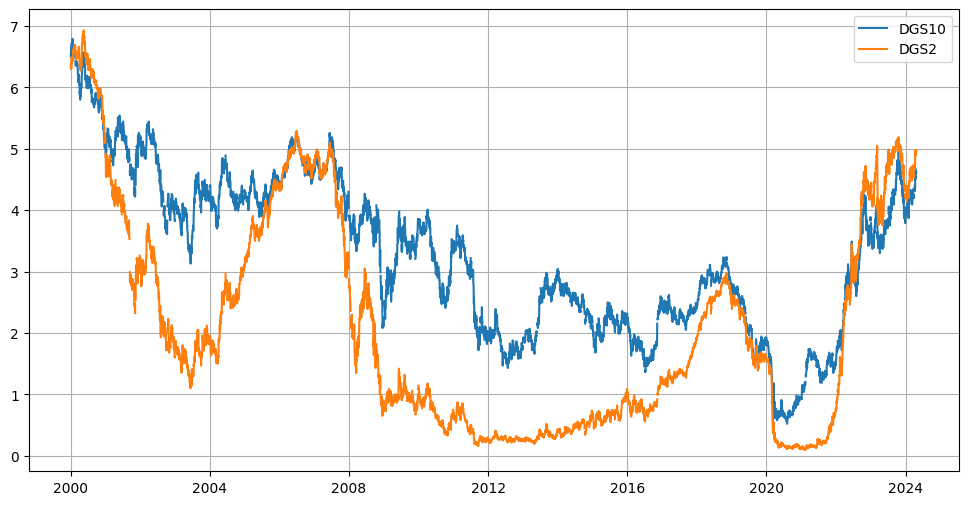

In [15]:
plt.figure(figsize=(12,6))
plt.plot(dgs2_dgs10_merged["DGS10"], label="DGS10")
plt.plot(dgs2_dgs10_merged["DGS2"], label="DGS2")
plt.legend()
plt.grid()

In [17]:
import yfinance as yf
snp500 = yf.download("^GSPC", period="max",interval="1d")
snp500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [18]:
mxx = yf.download("^MXX", period="max",interval="1d")
mxx.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-11-08,1418.800049,1418.800049,1418.800049,1418.800049,1418.800049,0
1991-11-11,1416.900024,1416.900024,1416.900024,1416.900024,1416.900024,0
1991-11-12,1445.400024,1445.400024,1445.400024,1445.400024,1445.400024,0
1991-11-13,1453.400024,1453.400024,1453.400024,1453.400024,1453.400024,0
1991-11-14,1459.300049,1459.300049,1459.300049,1459.300049,1459.300049,0


In [19]:
snp500 = snp500.loc[(snp500.index>="2019-04-09")&(snp500.index<="2024-04-09"), :]
mxx = mxx.loc[(mxx.index>="2019-04-09")&(mxx.index<="2024-04-09"), :]

In [20]:
mxx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100


In [23]:
print(mxx.loc[mxx.index[-1], "Adj Close"]/mxx.loc[mxx.index[0], "Adj Close"])
print(snp500.loc[snp500.index[-1], "Adj Close"]/snp500.loc[snp500.index[0], "Adj Close"])

1.2750624912566744
1.8101279426847174


In [29]:
results = list()
for company in ["MSFT", "AAPL", "GOOG", "JPM", "BRK-B", "2222.SR"]:
  ohlc_data = yf.download(company, start="2023-01-01", end="2023-12-31")
  max_adj_close = np.max(ohlc_data["Adj Close"])
  min_adj_close = np.min(ohlc_data["Adj Close"])
  results.append((max_adj_close-min_adj_close)/max_adj_close)

results

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[0.4242066914981641,
 0.3724441536845932,
 0.3924520921912013,
 0.28249927707093897,
 0.20775750091289963,
 0.21393070882746015]

In [30]:
results = dict()
start = date(year=2023, month=1, day=1)
end = date(year=2023, month=12, day=31)

for company in ["MSFT", "AAPL", "GOOG", "JPM", "BRK-B"]:
  div_data = yf.Ticker(company)
  div_data.dividends.index = pd.to_datetime(div_data.dividends.index)
  data_div_2023 = div_data.dividends[(div_data.dividends.index.tz_convert(None)>=pd.to_datetime("2023-1-1")) & (div_data.dividends.index.tz_convert(None)<=pd.to_datetime("2023-12-31"))]
  price_data = pdr.get_data_stooq(company, start, end)
  results[company] = np.sum(data_div_2023.values)/price_data["Close"][0]*100

print(results)

{'MSFT': 0.7419423465588767, 'AAPL': 0.49342959538773173, 'GOOG': 0.0, 'JPM': 2.380952380952381, 'BRK-B': 0.0}


In [33]:
nse_data = yf.download("^NSEI", period="max", interval="1d")
nse_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
